In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import folium
import plotly.express as px

In [2]:
# set some display options:
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 36)

In [3]:
data=pd.read_csv('netflix_titles.csv')

In [4]:
data.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

# EDA

In [5]:
data.describe(include='all').head()

show_id   type      title                director  \
count   6.234000e+03   6234       6234                    4265   
unique           NaN      2       6172                    3301   
top              NaN  Movie  Limitless  Raúl Campos, Jan Suter   
freq             NaN   4265          3                      18   
mean    7.670368e+07    NaN        NaN                     NaN   

                      cast        country       date_added  release_year  \
count                 5664           5758             6223    6234.00000   
unique                5469            554             1524           NaN   
top     David Attenborough  United States  January 1, 2020           NaN   
freq                    18           2032              122           NaN   
mean                   NaN            NaN              NaN    2013.35932   

       rating  duration      listed_in  \
count    6224      6234           6234   
unique     14       201            461   
top     TV-MA  1 Season  Documentaries   
freq     2027      1321            299   
mean      NaN       NaN            NaN   

                                              description  
count                                                6234  
unique                                               6226  
top     A surly septuagenarian gets another chance at ...  
freq                                                    3  
mean                                                  NaN

Nimber of movies and TV shows on Netflix:

In [6]:
data['type'].count()

6234

In [7]:
data.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool

### Content by Type

In [8]:
col='type'
to_group=data[col].value_counts().reset_index()
to_group=to_group.rename(columns= {col:'count','index':col})


fig=px.pie(to_group,
          values='count',
          names= 'type',
          title='Type of movies',
          template='seaborn')

fig.update_traces(textposition = 'inside',textinfo='percent+label')
fig.show()

### Countries with Most Content on Netflix

In [10]:
col='country'
country_group=data[col].value_counts().reset_index()
country_group=country_group.rename(columns={col:'count','index':col})
total_countries=country_group['count'].sum()
country_group['Country in%']=round(country_group['count']/total_countries*100)
#country_group['country']=country_group.index
country_group.loc[country_group['Country in%']<1 , 'country']= 'Other'

In [11]:
#country_group.head(10)

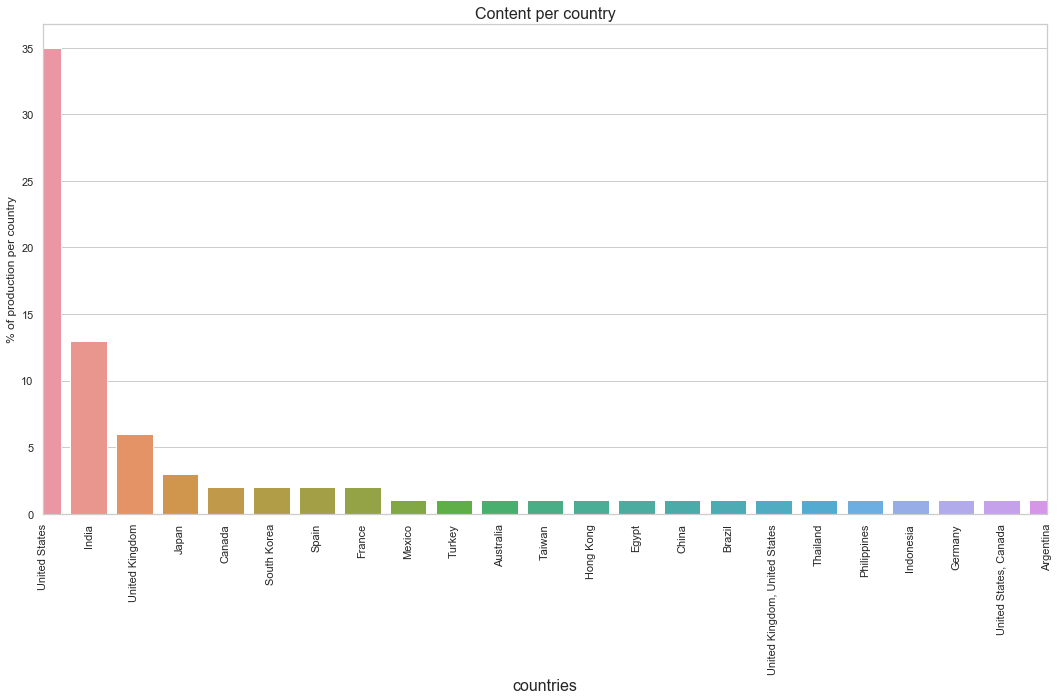

In [15]:
#show figure:
plt.figure(figsize=(18, 9))
chart=sns.barplot(y = 'Country in%',x = "country", data=country_group)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.title("Content per country", fontsize=16)
plt.xlabel("countries", fontsize=16)
plt.ylabel('% of production per country')
plt.xlim(0,22)


plt.show()



This chart shows countries that ptoduced higest % of content that are precented on Netflix
US is an obsolute leader of a content production, 35% of content precented on Netflix was produced by the US.

In [13]:
fig=px.choropleth(country_group,locations='country',color ='count',
                      locationmode='country names',
                      #range_color=[0,300],
                      color_continuous_scale=px.colors.sequential.Plasma,title='Content by country')

fig.update_layout
fig.show()

On map visualization we can see that US and India the only 2 countries that stand out as biggest Netflix content producer

Let's look closer on percentages destribution:

We see that 3 countries : USA , India and UK produced more then 50 % (54% - precisely)  of Netflix's content not counting movies that USA did in collaboration with other contries

In [16]:
country_group.head()

country  count  Country in%
0   United States   2032         35.0
1           India    777         13.0
2  United Kingdom    348          6.0
3           Japan    176          3.0
4          Canada    141          2.0

In [17]:
col='country'
country_group_1=data[col].value_counts().reset_index()
country_group_1=country_group_1.rename(columns={col:'count','index':col})
total_countries_1=country_group_1['count'].sum()
country_group_1['Country in%']=round(country_group_1['count']/total_countries_1*100)
#country_group['country']=country_group.index
country_group_1.loc[country_group_1['Country in%']<7 , 'country']= 'Other'

In [18]:
country_group_1.head()

country  count  Country in%
0  United States   2032         35.0
1          India    777         13.0
2          Other    348          6.0
3          Other    176          3.0
4          Other    141          2.0

In [19]:
fig=px.pie(country_group_1,
          #color = ["windows blue","windows blue","greyish"],
          values='count',
          names='country',
          
          title='US and Indea',
          template='seaborn')
fig.update_traces(textposition = 'inside',textinfo='value+percent+label')
fig.show()

###  Countries with Most Content  (by type)

In [23]:
#number of movies per country
movie_data=data.loc[(data['type']=='Movie')]
list_country=list(movie_data['country'].value_counts().index)
count_per_country=list(movie_data['country'].value_counts())
country_movie=pd.DataFrame({'type':'Movie','Country':list_country,'# count':count_per_country})[:10]

#number of TV shows per country
tv_show_data=data.loc[(data['type']=='TV Show')]
list_country_tv=list(tv_show_data['country'].value_counts().index)
count_tv_per_contry=list(tv_show_data['country'].value_counts())
country_tv_show=pd.DataFrame({'type':'TV Show', 'Country':list_country_tv,'# count':count_tv_per_contry})[:10]
#adding 2 tables together
country_movie_tv=pd.concat([country_movie,country_tv_show])

In [24]:
#choose 10 or 15 countries and see what types of production they do

In [25]:
#country_tv_show

In [26]:
new_country_movie_tv=country_movie_tv.loc[country_movie_tv['# count']>40]
new_country_movie_tv.head()

type         Country  # count
0  Movie   United States     1482
1  Movie           India      724
2  Movie  United Kingdom      170
3  Movie          Canada       88
4  Movie           Spain       80

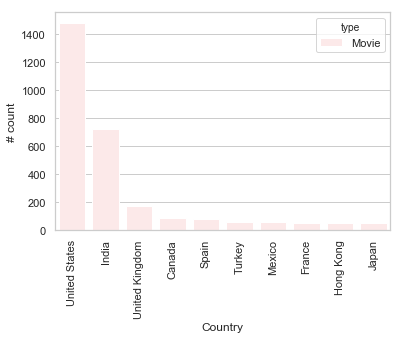

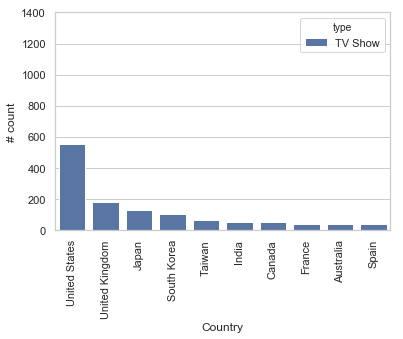

In [27]:

plt.figure(figsize=(6, 4))
sns.barplot(x = "Country", y = '# count', hue='type', data=country_movie[:15],color='darkred')
plt.xticks(rotation=90)

plt.figure(figsize=(6, 4))
g=sns.barplot(x = "Country", y = '# count', hue='type', data=country_tv_show[:15])
plt.xticks(rotation=90)
#scaling y-axis to be the same size as 1st plot
g.set_ylim(0, 1400)

plt.show()

In [28]:
#create separate tables with TV shows and Movies
movie_data=data.loc[(data['type']=='Movie')]
movie_data.head(3)
tv_show_data=data.loc[(data['type']=='TV Show')]
tv_show_data.head()

show_id     type                             title director  \
2   70234439  TV Show                Transformers Prime      NaN   
3   80058654  TV Show  Transformers: Robots in Disguise      NaN   
5   80163890  TV Show                           Apaches      NaN   
8   80117902  TV Show                      Fire Chasers      NaN   
26  80244601  TV Show                   Castle of Stars      NaN   

                                                 cast        country  \
2   Peter Cullen, Sumalee Montano, Frank Welker, J...  United States   
3   Will Friedle, Darren Criss, Constance Zimmer, ...  United States   
5   Alberto Ammann, Eloy Azorín, Verónica Echegui,...          Spain   
8                                                 NaN  United States   
26  Chaiyapol Pupart, Jintanutda Lummakanon, Worra...            NaN   

           date_added  release_year    rating  duration  \
2   September 8, 2018          2013  TV-Y7-FV  1 Season   
3   September 8, 2018          2016     TV-Y7  1 Season   
5   September 8, 2017          2016     TV-MA  1 Season   
8   September 8, 2017          2017     TV-MA  1 Season   
26  September 7, 2018          2015     TV-14  1 Season   

                                            listed_in  \
2                                            Kids' TV   
3                                            Kids' TV   
5   Crime TV Shows, International TV Shows, Spanis...   
8                     Docuseries, Science & Nature TV   
26  International TV Shows, Romantic TV Shows, TV ...   

                                          description  
2   With the help of three human allies, the Autob...  
3   When a prison ship crash unleashes hundreds of...  
5   A young journalist is forced into a life of cr...  
8   As California's 2016 fire season rages, brave ...  
26  As four couples with different lifestyles go t...

In [29]:
len(tv_show_data)

1969

### How production changed over the years?

In [30]:
col='release_year'
data_year=data[col].value_counts().reset_index()
data_year=data_year.rename(columns={col:'count','index':col})
total_movies=data_year['count'].sum()
data_year['% of movies']=round(data_year['count']/total_movies*100,2)
data_year=data_year.sort_values(by=['release_year'], ascending=False)
data_year.reset_index(drop=True, inplace=True)
data_year[:5]

release_year  count  % of movies
0          2020     25         0.40
1          2019    843        13.52
2          2018   1063        17.05
3          2017    959        15.38
4          2016    830        13.31

In [31]:
print( '''Around {:.2f}%  of movies presented on Netflix was producer in the last 5 years '''
.format (data_year[:5]['% of movies'].sum().round()))

Around 60.00%  of movies presented on Netflix was producer in the last 5 years 


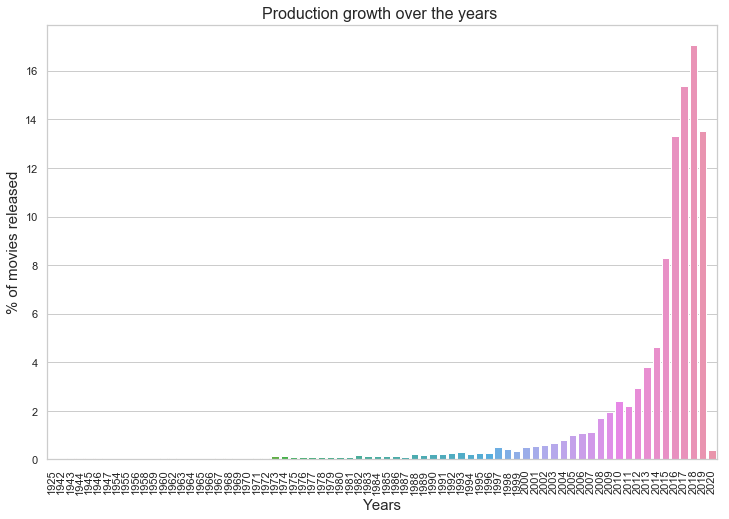

In [37]:
plt.figure(figsize=(12,8))
sns.barplot(x='release_year',y='% of movies',data=data_year)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Production growth over the years ',fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Years',fontsize=15)
plt.ylabel('% of movies released',fontsize=15)
plt.show()

it looks like production growth droped in 2019 almost to the level on 2016, to see what exectly happend let's separate Movie production from TV production

In [51]:
#movies
movie_per_year=list(movie_data['release_year'].value_counts().index)
movie_per_year_count=list(movie_data['release_year'].value_counts())
new_movie_data=pd.DataFrame({'type':'Movie','Year':movie_per_year,'# per year':movie_per_year_count})
new_movie_data
#tv_shows 
tv_show_per_year=list(tv_show_data['release_year'].value_counts().index)
tv_show_per_year_count=list(tv_show_data['release_year'].value_counts())
new_tv_show_data=pd.DataFrame({'type':'TV Show','Year':tv_show_per_year,'# per year':tv_show_per_year_count})
#adding together
movie_tv_show=pd.concat([new_movie_data, new_tv_show_data],ignore_index=True,sort=True)
movie_tv_show.head()

# per year  Year   type
0         682  2017  Movie
1         646  2018  Movie
2         593  2016  Movie
3         400  2019  Movie
4         363  2015  Movie

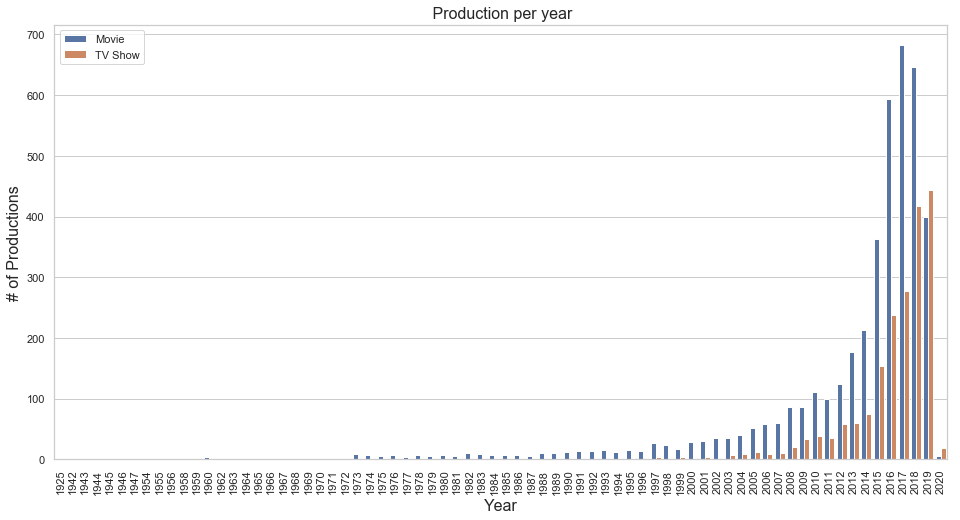

In [52]:
plt.figure(figsize=(16, 8))
sns.barplot(x = "Year", y = '# per year', hue='type', data=movie_tv_show,
            hue_order = ['Movie','TV Show'])
plt.title(" Production per year", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("# of Productions", fontsize=16)
plt.legend(loc="upper left")
plt.show()


we see that movie and TV show procuction was growing year after yeat but straring from 2018 the situation started to change 
and in 2019 it looks like it swithched from movie production to TV shows. 2020 its too early to make couclusions but from the biggining of the year it lookl like the trend is there, it was already produced more TV shows then movies

### Rating

In [53]:
data_rating=data['rating'].value_counts().reset_index()
data_rating=data_rating.rename(columns={'index':'rating','rating':'count'})

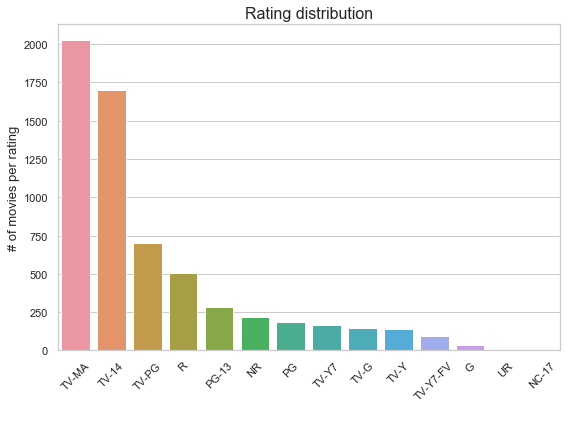

In [54]:
plt.figure(figsize=(9, 6))
sns.barplot(x = "rating", y = 'count', data=data_rating)
plt.title("Rating distribution", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("# of movies per rating", fontsize=13)
plt.xlabel(" ")
plt.show()

* TV-MA is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17
* TV-14 contains some material that many parents would find unsuitable for children under 14 years of age
* TV-PG contains material that parents may find unsuitable for younger children
* R: Restricted – Under 17
* PG-13: Parents Strongly Cautioned 

If there is differents between rating of TV-Shows and movies or distribution is more or less the same

In [55]:
movie_tv_show=pd.concat([new_movie_data, new_tv_show_data],ignore_index=True,sort=True)
movie_tv_show.head()

# per year  Year   type
0         682  2017  Movie
1         646  2018  Movie
2         593  2016  Movie
3         400  2019  Movie
4         363  2015  Movie

In [56]:
#movie rating
rating_index=list(movie_data['rating'].value_counts().index)
rating_count=list(movie_data['rating'].value_counts())
rating_movie=pd.DataFrame({'type':'Movie','Rating':rating_index,'count':rating_count})
#TV Show rating
tv_rating_index=list(tv_show_data['rating'].value_counts().index)
tv_rating_count=list(tv_show_data['rating'].value_counts())
rating_tv_shows=pd.DataFrame({'type':'TV Show','Rating':tv_rating_index,'count':tv_rating_count})
#adding 
rating_both=pd.concat([rating_movie,rating_tv_shows],ignore_index=True,sort=True)
rating_both.head()

Rating  count   type
0  TV-MA   1348  Movie
1  TV-14   1038  Movie
2      R    506  Movie
3  TV-PG    432  Movie
4  PG-13    286  Movie

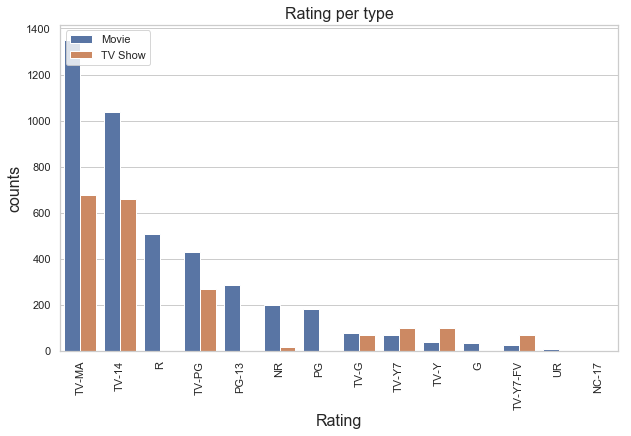

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x = "Rating", y = 'count', hue='type', data=rating_both,
            hue_order = ['Movie','TV Show'])
plt.title("Rating per type", fontsize=16)
plt.xlabel("Rating", fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("counts", fontsize=16)
plt.legend(loc="upper left")
plt.show()

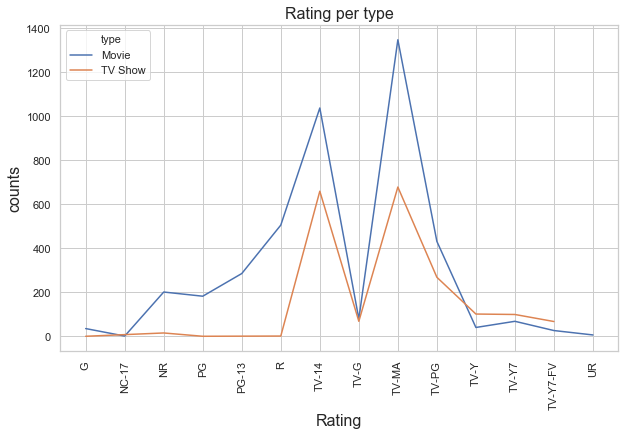

In [58]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = "Rating", y = 'count', hue='type', data=rating_both,
            hue_order = ['Movie','TV Show'])
plt.title("Rating per type", fontsize=16)
plt.xlabel("Rating", fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("counts", fontsize=16)
plt.legend(loc="upper left")
plt.show()

### Duration

In [59]:
data_tv=data.loc[data['type']=='TV Show']
duration_tv=data_tv['duration'].value_counts().reset_index()
duration_tv=duration_tv.rename(columns={'index':'# of seasons','duration':'counts'})
total_seasons=duration_tv['counts'].sum()
duration_tv['%']=round(duration_tv['counts']/total_seasons*100,2)
duration_tv

# of seasons  counts      %
0      1 Season    1321  67.09
1     2 Seasons     304  15.44
2     3 Seasons     158   8.02
3     4 Seasons      61   3.10
4     5 Seasons      46   2.34
5     6 Seasons      22   1.12
6     7 Seasons      21   1.07
7     8 Seasons      16   0.81
8     9 Seasons       7   0.36
9    10 Seasons       3   0.15
10   11 Seasons       3   0.15
11   12 Seasons       2   0.10
12   15 Seasons       2   0.10
13   13 Seasons       2   0.10
14   14 Seasons       1   0.05

In [60]:
duration_tv['%']=round(duration_tv['counts']/total_seasons*100)

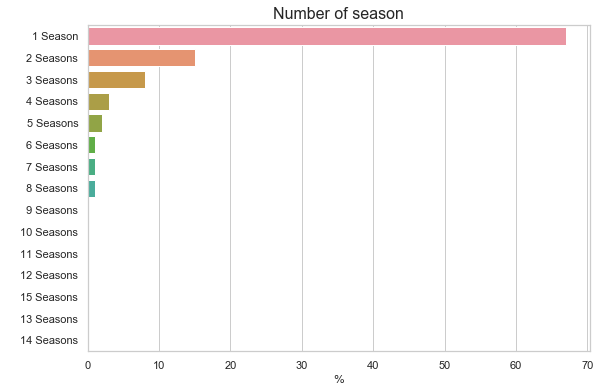

In [61]:
plt.figure(figsize=(9, 6))
sns.barplot(y= "# of seasons", x = '%', data=duration_tv)
plt.title("Number of season", fontsize=16)
#plt.xticks(rotation=90)
plt.ylabel(" ", fontsize=10)

plt.show()

Around 67% of TV Shows have only one season 

In [187]:
duration_tv.loc[duration_tv['counts']<7]

# of seasons  counts    %
9    10 Seasons       3  0.0
10   11 Seasons       3  0.0
11   12 Seasons       2  0.0
12   15 Seasons       2  0.0
13   13 Seasons       2  0.0
14   14 Seasons       1  0.0

### Length of movies 

Movie duration in different countries

In [193]:
movie_data=data.loc[(data['type']=='Movie')]

In [226]:
#creating a list of top 10 countries by added content 
countries=list(country_group['country'])[:10]
#creating a table only with top 10 countries
data_10_countries=movie_data[movie_data.country.isin(countries)]

In [292]:
data_10=data_10_countries[['country','duration']]


In [314]:
#dropping min 
z=data_10['duration'].str.strip().str.split(' ',n=1,expand=True)
z=z.drop(columns=[1],axis=1)
z=z.rename(columns={0:'min'})
#convert column ' min ' into int
z=pd.to_numeric(z['min'])
#merge 2 tables back
data_10_countries_1=pd.concat([data_10,z],axis=1,sort=False)

#drop duration

data_10_countries_1=data_10_countries_1.drop(columns=['duration'], axis=1)


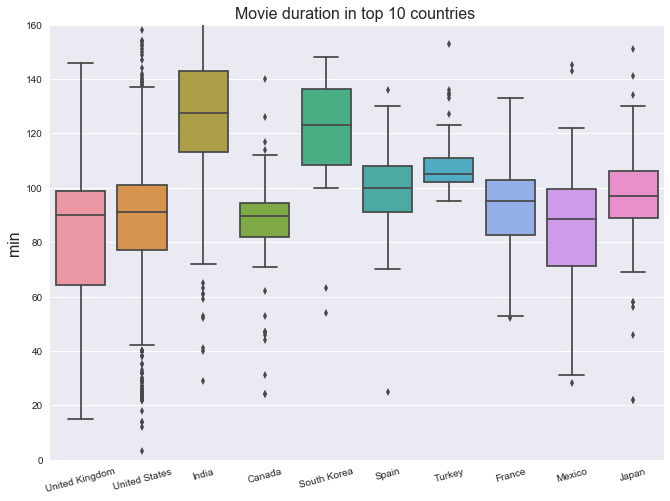

In [315]:
plt.figure(figsize=(11,8))
sns.boxplot(x='country',
           y='min',
           data=data_10_countries_1)
plt.title('Movie duration in top 10 countries ',fontsize=16)
plt.xlabel('', fontsize=16)
plt.ylabel('min',fontsize=16)
plt.xticks(rotation=15)
plt.ylim(0, 160)
plt.show()

In [341]:
data_minutes=data_10_countries_1.drop(columns=['country'], axis=1)
r=data_minutes['min'].value_counts().reset_index()
r=r.rename(columns={'index':'min','min':'counts'})


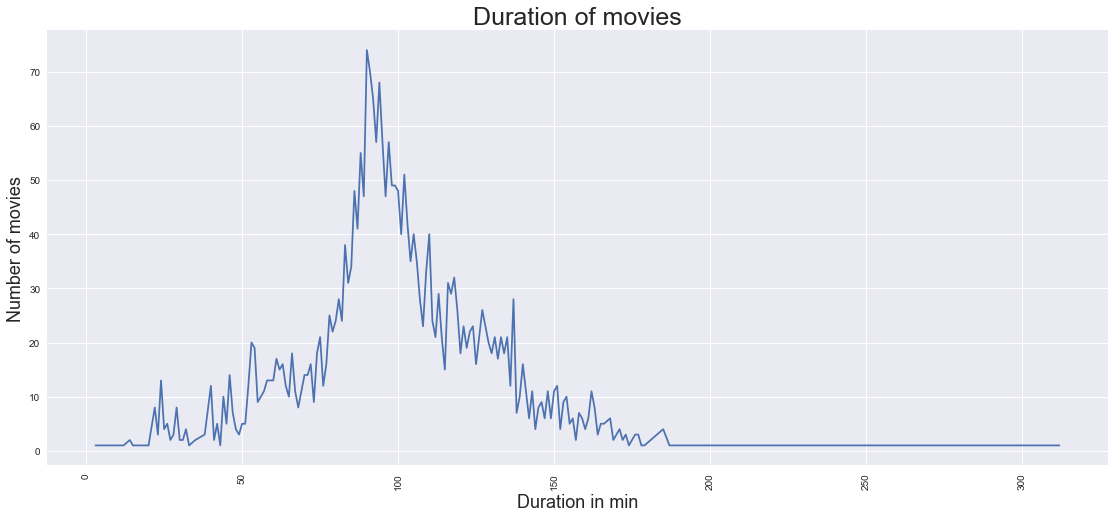

In [354]:
plt.figure(figsize=(19, 8))
sns.lineplot(x = "min", y="counts",  data=r)
plt.title("Duration of movies", fontsize=25)
plt.xlabel("Duration in min", fontsize=18)
plt.xticks(rotation=90)

plt.ylabel("Number of movies", fontsize=18)
plt.show()

### Movies by genre

In [202]:
data_genre=data['listed_in'].value_counts().reset_index()
data_genre=data_genre.rename(columns={'index':'genre','listed_in':'count'})[:10]
data_genre

genre  count
0                                     Documentaries    299
1                                   Stand-Up Comedy    273
2                      Dramas, International Movies    248
3  Dramas, Independent Movies, International Movies    186
4            Comedies, Dramas, International Movies    174
5                                          Kids' TV    159
6               Documentaries, International Movies    150
7                Children & Family Movies, Comedies    129
8                          Children & Family Movies    120
9                    Comedies, International Movies    120

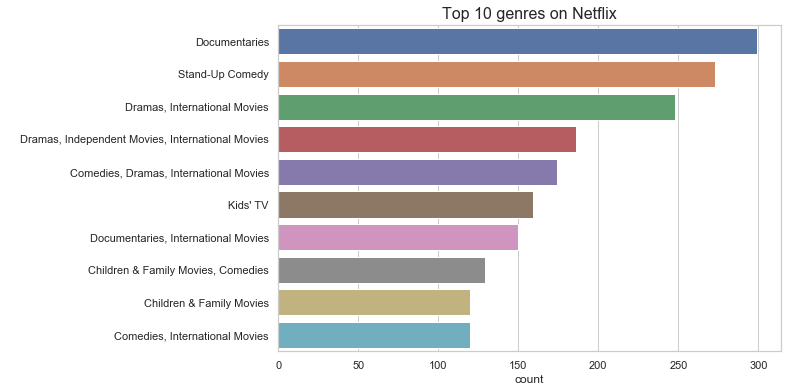

In [209]:
plt.figure(figsize=(9, 6))
sns.barplot(y = "genre", x = 'count', data=data_genre)
plt.title("Top 10 genres on Netflix", fontsize=16)
plt.ylabel(" ", fontsize=10)
plt.show()

In [ ]:
data_tv=data.loc[data['type']=='TV Show']

In [78]:
cast_data=data[['cast','country']]
len(cast_data)

6234

In [81]:
cast_data=cast_data.dropna()
len(cast_data)

5271

## Amount of content added per month

In [148]:
data_month_1=data['date_added'].reset_index()


In [175]:
#checking null values
data_month_1.isnull().any()


index         False
date_added    False
dtype: bool

In [166]:
#drop null values
data_month_1=data_month_1.dropna()
data_month_1.isnull().any()

index         False
date_added    False
dtype: bool

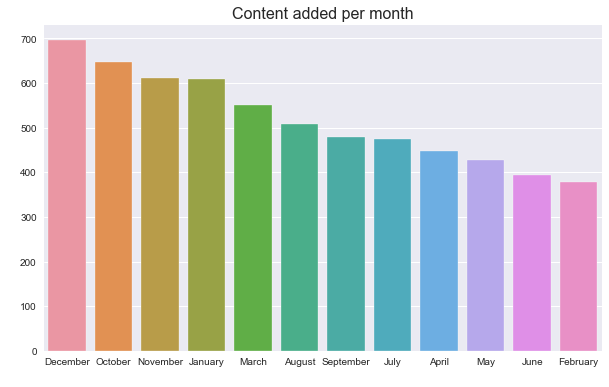

In [186]:
#deleating space before each month to split months and years later
data_month_1['date_added'].str.strip()
#spliting
y=data_month_1['date_added'].str.strip().str.split(' ',n=1,expand=True)

y=y.drop(columns=[1], axis=1)
count_month=y[0].value_counts().reset_index()
count_month=count_month.rename(columns={'index':'month',0:'counts'})

plt.figure(figsize=(10, 6))
sns.barplot(x= "month", y = 'counts', data=count_month)
plt.title("Content added per month", fontsize=16)
plt.ylabel(" ", fontsize=10)
plt.xlabel(" ", fontsize=10)
plt.show()

##  Word Cloud

most popular words for title

In [88]:
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from PIL import Image
plt.style.use('seaborn')

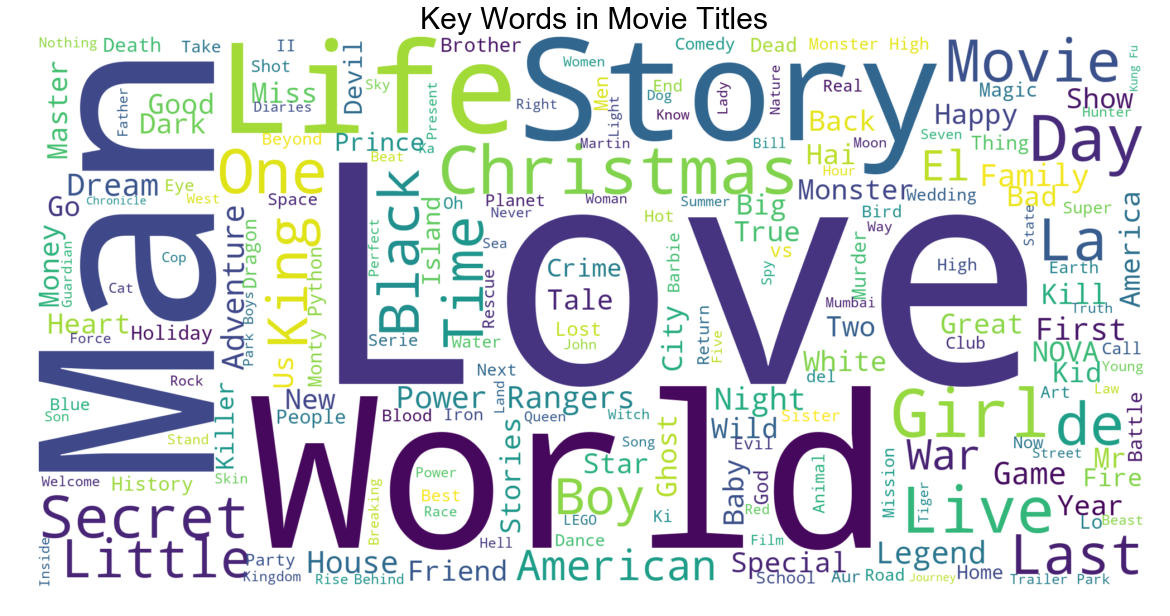

In [120]:
data_title=data['title'].str.split("(").str[0].value_counts().keys()
word_cloud=WordCloud(stopwords=STOPWORDS,scale=5,max_words=1000,
                     background_color="white").generate(" ".join(data_title))
plt.figure(figsize=(20,14))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in Movie Titles",color='black',fontsize=30)
plt.show()